In [1]:
%run "..\src\utils\notebook_style.ipynb"

# Zuggurtmodell

## Verbundschubspannungs-Schlupfbeziehung

Die Verbundschuspannungs-Schlupfbeziehung wird in @Spathelf2022 foglendermassen postuliert:
Es wird hier auf die Stahlspannung sich bezogen, nicht auf den Schlupf

In [2]:
sigma_s, f_cc, f_sy = sp.symbols('sigma_s f_cc f_sy')
tau_b = sp.Function('tau_b')(sigma_s)

In [3]:
eq_tau_b = Eqn(tau_b,sp.Piecewise((0, sigma_s<=0),(0.6*f_cc **(sp.Rational(2,3)), sigma_s<=f_sy), (0.3*f_cc**(sp.Rational(2,3)), sigma_s >f_sy)))
eq_tau_b_lambd = sp.lambdify((sigma_s, f_sy, f_cc), eq_tau_b.rhs)


eq_tau_b

Equation(tau_b(sigma_s), Piecewise((0, sigma_s <= 0), (0.6*f_cc**(2/3), f_sy >
= sigma_s), (0.3*f_cc**(2/3), True)))

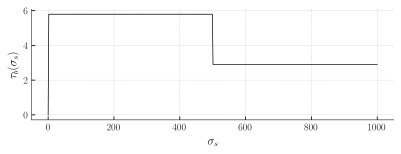

In [4]:
#| label: fig-zg-verbundschubbez
#| fig-cap: Verbundschubspannung als Funktion der Betonstahlspannung

f_sy_num = 500

sigma_s_array = np.linspace(0,f_sy_num*2,500)
tau_b_array = eq_tau_b_lambd(sigma_s_array, f_sy_num, 30)

plt.plot(sigma_s_array, tau_b_array, color='black')
plt.xlabel(f'${sp.latex(sigma_s)}$')
plt.ylabel(f'${sp.latex(tau_b)}$')
plt.show()

In [5]:
from src.models.material import * 
from src.models.zuggurtmodell import Zuggurtmodell

In [6]:
Ec, rho_c, f_cc, f_ct, A_c, epsilon_cs,  = sp.symbols('Ec, rho_c, f_cc, f_ct, A_c \\varepsilon_cs ')
Es, rho_s, f_sc, f_st, A_s = sp.symbols('Es, rho_s, f_sc, f_st, A_s')
rho_v = sp.symbols('rho_v')

In [7]:
params_beton = {
    Ec : 30000*unit.N/unit.mm**2,
    rho_c: 2000*unit.kg /unit.m**3, 
    f_cc: 20*unit.N/unit.mm**2,
    f_ct: 3*unit.N/unit.mm**2,
    A_c: 200*unit.mm * 500*unit.mm,
    epsilon_cs: 0.002,
}
params_betonstahl = {
    Es:205000*unit.N/unit.mm**2,
    rho_s:7850*unit.kg/unit.m**3,
    f_sc:500*unit.N/unit.mm**2,
    f_st:500*unit.N/unit.mm**2,
    A_s: 3 * (10*unit.mm)**2 *sp.pi / 4,
    
}
params_verbund = {
    rho_v: 2500*unit.kg/unit.m**3
}

In [8]:
beton_num = Beton(*params_beton.values())
betonstahl_num = Betonstahl(*params_betonstahl.values())
verbund_num = Verbund(beton_num, betonstahl_num, *params_verbund.values())


In [9]:
res1_num = Zuggurtmodell(100*unit.N, beton_num, betonstahl_num, verbund_num)